### Objective
This notebook aims to visualise the errors and learn from them.
The misclassified values are calculated for train, validation and test samples. The learning curves plotted for different classification models.

In [1]:
from dataloader import get_x_y, train_val_test_split_data
from classifiers import Classifier
from evaluation import evaluate
from lfm import plot_lc, mis_visual, err_score

In [2]:
x, y = get_x_y()
x_train, x_val, x_test, y_train, y_val, y_test = train_val_test_split_data(0.2)

### Understanding Graphs
* The difference between training error and validation error gives an indication of - `high variance` or `overfitting`.
* The difference between human-level error and training error *(Avoidable Bias)* gives an indication of - `high bias` or `underfitting`.


![title](https://www.dataquest.io/wp-content/uploads/2019/01/biasvariance.png)

#### Learning Curves
* The Learning Curves can be an indication of when adding more data may be helpful and when it may not.
* They help visualise the model's performance and it's scability. 

![title](https://www.dataquest.io/wp-content/uploads/2019/01/add_data.png)


### Learning Outcomes - Methods to improve Model

* #### Overfitting :
 * Indication of high variance.
 * More data will be helpful.
* #### High variance Issues :
 * Removing unecessary features from the dataset.
 * Increasing the regularisation parameter.
 * Training on More Data.
* #### Underfitting :
 * Indication of high bias, implying reduce bias.
 * More data is *not* useful in such cases.
* #### High bias Issues : 
 * Training a larger model.
 * Adding more features.
 * Adding polynomial features.
 * Decreasing regularisation parameter.
 * Better optimization algorithm.

* ##### KNeighbours Classifier

In [3]:
model = Classifier()
clf = model.KNeighbors(x_train, y_train)

In [4]:
errors = err_score(clf, x_train, x_val, x_test, y_train, y_val, y_test)
errors

{'train-error %': 2.034641068447407,
 'validation-error %': 4.006677796327207,
 'test-error %': 4.572763684913217}

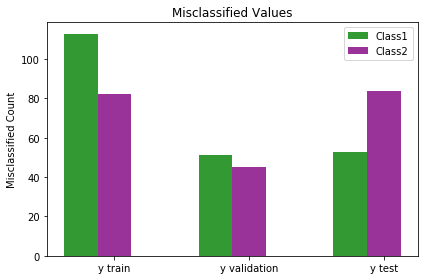

In [5]:
mis_visual(clf,x_train, x_val, x_test,y_train, y_val, y_test)

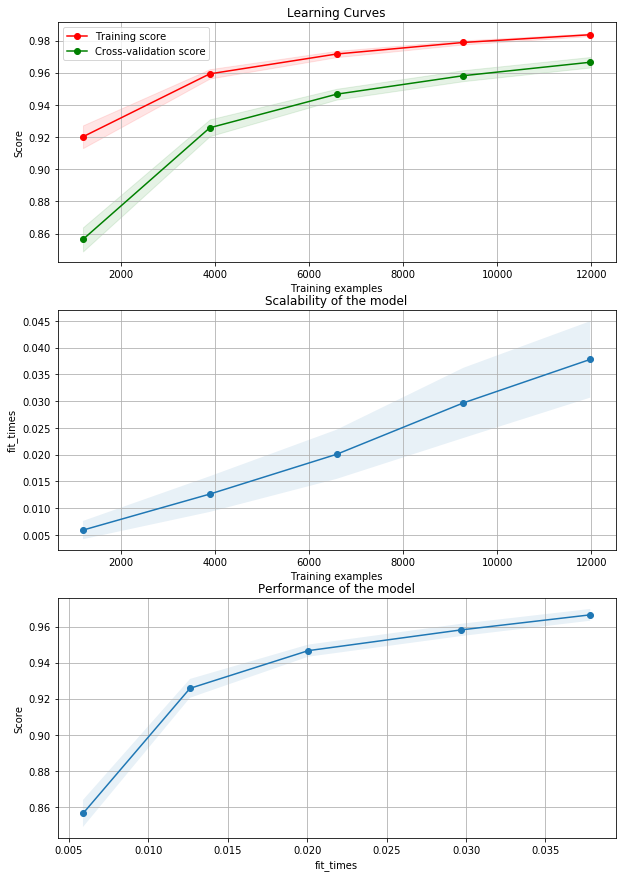

In [6]:
plot_lc(clf)

* ##### Random Forest Classifier

In [7]:
clf = model.Random_Forest(x_train, y_train)

In [8]:
errors = err_score(clf, x_train, x_val, x_test, y_train, y_val, y_test)
errors

{'train-error %': 0.0,
 'validation-error %': 7.8046744574290505,
 'test-error %': 7.376502002670227}

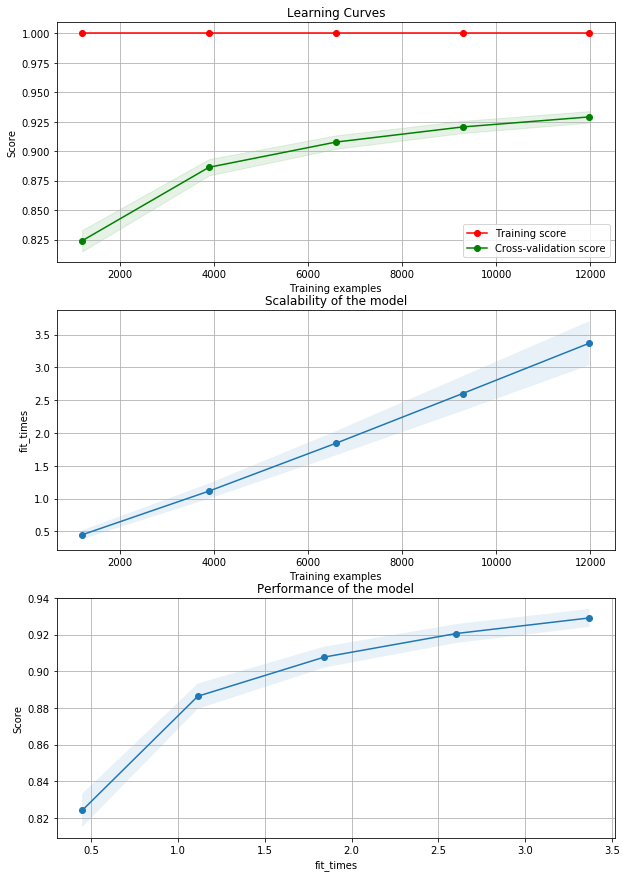

In [10]:
plot_lc(clf)

* ##### Gaussian Naive Bayes Classifier

In [11]:
clf = model.Gaussian(x_train, y_train)

In [12]:
errors = err_score(clf, x_train, x_val, x_test, y_train, y_val, y_test)
errors

{'train-error %': 40.50500834724541,
 'validation-error %': 39.524207011686144,
 'test-error %': 40.62082777036048}

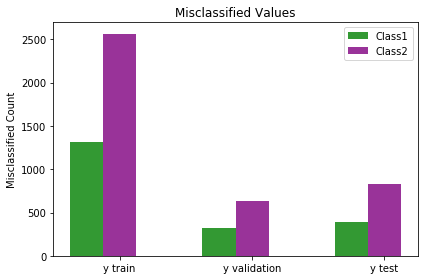

In [13]:
mis_visual(clf,x_train, x_val, x_test,y_train, y_val, y_test)

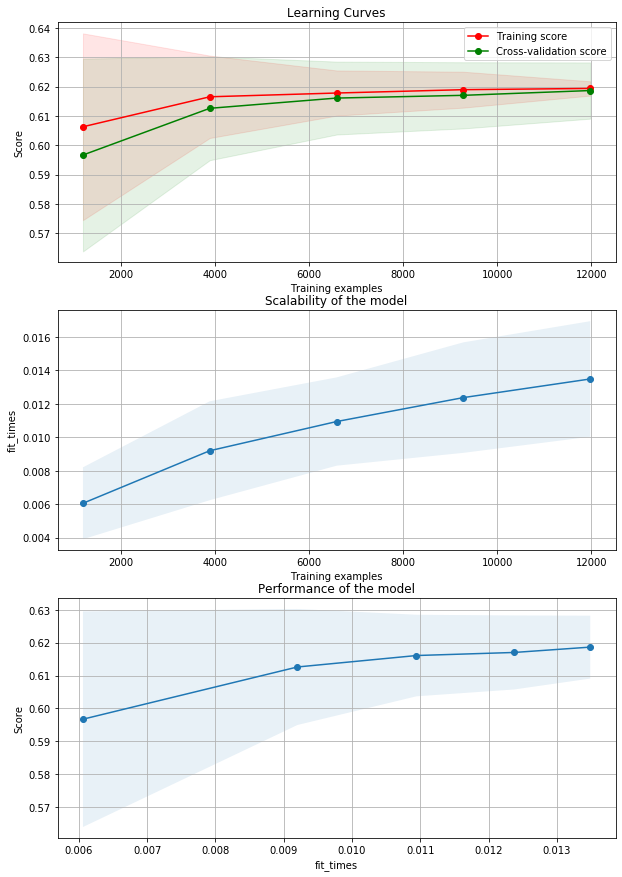

In [14]:
plot_lc(clf)

* ##### Decision Tree Classifier

In [15]:
clf = model.Decision_Tree(x_train, y_train)

In [16]:
errors = err_score(clf, x_train, x_val, x_test, y_train, y_val, y_test)
errors

{'train-error %': 0.0,
 'validation-error %': 16.903171953255423,
 'test-error %': 16.889185580774367}

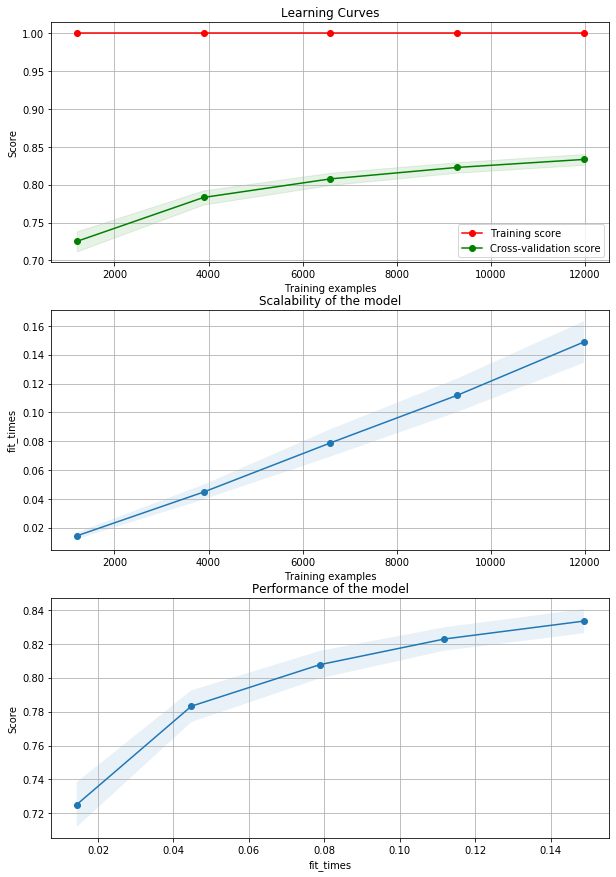

In [18]:
plot_lc(clf)

* ##### Logistic Regression

In [19]:
clf = model.Logistic_Reg(x_train, y_train)

/home/aditi/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
errors = err_score(clf, x_train, x_val, x_test, y_train, y_val, y_test)
errors

{'train-error %': 36.0287979966611,
 'validation-error %': 34.59933222036727,
 'test-error %': 35.9479305740988}

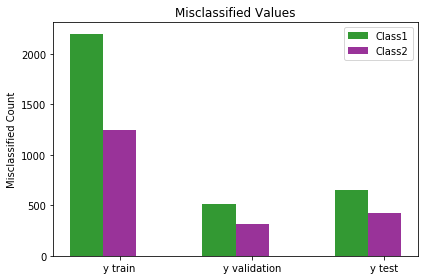

In [21]:
mis_visual(clf, x_train, x_val, x_test, y_train, y_val, y_test)

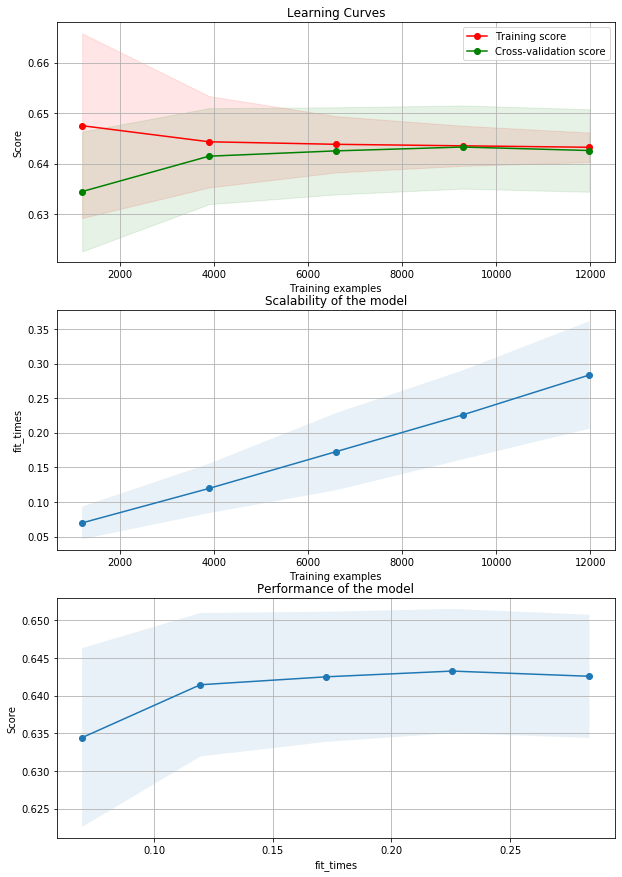

In [22]:
plot_lc(clf)

### Conclusion
#### 1. K-NN
The learning curves for the model are *ideal*, indicating no bias or variance issues. The number of misclassified values are comparitively less compared to any other model. To further reduce the test error, we may need to *focus on the variance* of the dataset.
#### 2. Random Forest
This model is an example of an *overfit* model. The test and validation error are 7% whereas the train error 0%. The above stated measures can be applied to improve model's performance The scalibility and perforamnce of the model rank 2 compared to others.
#### 3. Gausian NB
The model can be improved by focusing on it's *bias*. The overalapping trainng and cross-val scores are an indication of that.The number of misclassified values are equal to that of Logistic Regresssion.
#### 5. Decision Tree Classifier
Considering Decision Tree is algorithmically is similar to Random Forest, their behaiviour is also almost similar.
This too is an example of *overfit* model. The training error measures to zero, but test and validation 16%.
The scalibility and the performance is comparitively better.
#### 4. Logistic Regression
The training and validation regions tend to overlap, indication more data will not be helpful to improve the models performance. The count of misclassified values to goes way up to 2000. One needs to *focus on the bias*to improve the model.

*Note : The above stated Learning Outcomes are the measures to improve any model's performance.*